# Business Case -- 
#The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. 
#The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y).

In [1]:
import os
import pandas as pd
import numpy as np
#from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.model_selection import train_test_split #train & validation
import seaborn as sns #Visualization
sns.set(style="white") #plot background
sns.set(style="whitegrid", color_codes=True) #plot background 


In [2]:

#os.chdir('C:\\Users\\sxv210087\\Desktop\\ivy\\Logit')
os.getcwd()
data_org = pd.read_csv('Banking.csv', header=0)
data = data_org
#data = data.dropna()
print(data.shape)
print(list(data.columns))


(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


# EDA

In [ ]:
#1. Predict variable (desired target)
# y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

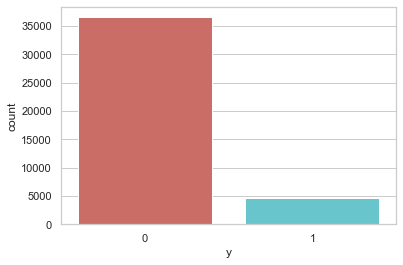

In [3]:

#Barplot for the dependent variable
sns.countplot(x='y',data=data, palette='hls')
plt.show()
#len(data[data['y']==1])/len(data)
#len(data[data['y']==0])/len(data)


In [ ]:

#count
data.y.value_counts()


In [ ]:
#Check the missing values
data.isnull().sum()

In [ ]:
#Customer job distribution
sns.countplot(y="job", data=data)
plt.show()

In [ ]:
#count
data.job.value_counts()

In [ ]:
#Customer marital status distribution
sns.countplot(x="marital", data=data)
plt.show()

In [ ]:
#Barplot for credit in default
sns.countplot(x="default", data=data)
plt.show()

In [ ]:
#Barplot for housing loan
sns.countplot(x="housing", data=data)
plt.show()

In [ ]:
#Barplot for personal loan
sns.countplot(x="loan", data=data)
plt.show()

In [ ]:
#Barplot for previous marketing loan outcome
sns.countplot(x="poutcome", data=data)
plt.show()

Our prediction will be based on the customer’s job, marital status, whether he(she) has credit in default, 
whether he(she) has a housing loan, whether he(she) has a personal loan, and the outcome of the previous marketing campaigns. 
So, we will drop the variables that we do not need.


In [ ]:
data.columns

In [4]:
#Dropping the redundant columns
data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [5]:
#Creating Dummy Variables
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [6]:
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [7]:
#Drop the unknown columns
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [ ]:
#Check the independence between the independent variables
sns.heatmap(data2.corr())
plt.show()

In [8]:
# Split the data into training and test sets
X = data2.iloc[:,1:] #Feature Class
y = data2.iloc[:,0] #Dependent Class


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape
columns = X_train.columns


In [10]:
print(X_train.shape)
print(X_test.shape)

(30891, 23)
(10297, 23)


Since the dataset is imbalanced:

# Synthetic Minority Oversampling Technique (SMOTE) to solve the problem of Imbalanced Data


# Works by creating synthetic samples from the minor class (subscription) instead of creating copies.
#Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [ ]:
data_new=pd.get_dummies(data_org, columns =['job','marital','default','housing','loan','poutcome'])
data_new.columns.values


In [ ]:
data_new.head(1)

In [ ]:
X = data_new.loc[:, data_new.columns != 'y']
y = data_new.loc[:, data_new.columns == 'y']


In [ ]:
X = data2.loc[:, data2.columns != 'y']
y = data2.loc[:, data2.columns == 'y']


In [ ]:
!pip3 install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
#On Train Data
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])


In [ ]:
#On Test Data
os_data_test_X,os_data_test_y=os.fit_sample(X_test, y_test)
os_data_test_X = pd.DataFrame(data=os_data_test_X,columns=columns )
os_data_test_y= pd.DataFrame(data=os_data_test_y,columns=['y'])


In [ ]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))


In [ ]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(X))
print("Number of no subscription in original data",len(y[y['y']==0]))
print("Number of subscription",len(y[y['y']==1]))
print("Proportion of no subscription data in original data is ",len(y[y['y']==0])/len(X))
print("Proportion of subscription data in original data is ",len(y[y['y']==1])/len(X))


In [ ]:
#Now we have a balanced Data

In [ ]:
# Recursive Feature Elimination for selecting Important Variables

data_final_vars=data2.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
len(rfe.ranking_)
print(rfe.ranking_)


In [ ]:
# Fitting the Logit Model
X=os_data_X.drop(['job_unknown','marital_unknown','default_unknown','loan_unknown'],axis =1)
X=os_data_X
y=os_data_y['y']


In [ ]:
# Evaluating the Logistic Model With SMOTE
# =============================================================================
classifier_SM = LogisticRegression(random_state=0)
classifier_SM.fit(X, y)

y_pred_SM = classifier_SM.predict(os_data_test_X)
y_pred_train_SM = classifier_SM.predict(X)



from sklearn.metrics import confusion_matrix
confusion_matrix_SM = confusion_matrix(os_data_test_y, y_pred_SM)

print(confusion_matrix_SM)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))


from sklearn.metrics import classification_report
print(classification_report(os_data_test_y, y_pred_SM))


# Fitting the Logistic Model with sklearn

In [15]:
#Without SMOTE
classifier = LogisticRegression(random_state=0) #Logistic Regression classifier
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
pd.DataFrame(y_pred_train).head()

,0
0,0
1,0
2,0
3,0
4,0


In [16]:

# =============================================================================
# Evaluating the Logistic Model Without SMOTE
# =============================================================================
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


[[9046  110]
 [ 912  229]]
Accuracy of logistic regression classifier on test set: 0.90
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      9156
           1       0.68      0.20      0.31      1141

    accuracy                           0.90     10297
   macro avg       0.79      0.59      0.63     10297
weighted avg       0.88      0.90      0.88     10297



#Precision () is defined as the number of true positives () over the number of true positives plus the number of false positives ().
#Recall () is defined as the number of true positives () over the number of true positives plus the number of false negatives ().

#Interpretation:Interpretation: Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 90% of the customer’s preferred term deposits that were promoted.

# Fitting the Logistic Model with statsmodel

In [13]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit(method='bfgs') #broyden, fletcher goldfarb Shanno (S) , bfgs - Optimization methods help to eliminate the problem of singular matrix
print(result.summary2())


         Current function value: 0.315020
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                                  Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.108     
Dependent Variable:        y                     AIC:                   19506.5790
Date:                      2022-08-09 02:28      BIC:                   19690.0198
No. Observations:          30891                 Log-Likelihood:        -9731.3   
Df Model:                  21                    LL-Null:               -10914.   
Df Residuals:              30869                 LLR p-value:           0.0000    
Converged:                 0.0000                Scale:                 1.0000    
----------------------------------------------------------------------------------
                      Coef.    Std.Err.     z    P>|z|      [0.025       0.975]   
----------------------------------------------------------------------

In [12]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# If the customer is retired then the log odds of opting for term deposit increases by 0.7403